Name : Abhishek Ghodse

Iris Flowers Classification ML Project

Import Libraries

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Data Processing

In [6]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [284]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [285]:
df.shape

(150, 5)

In [286]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [288]:
df['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

Preprocessing the dataset

In [289]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

<AxesSubplot:>

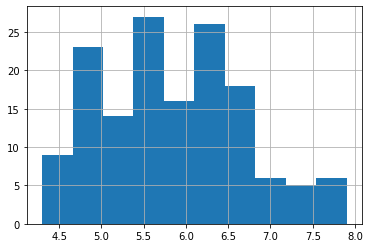

In [290]:
df['sepal_length'].hist()

<AxesSubplot:>

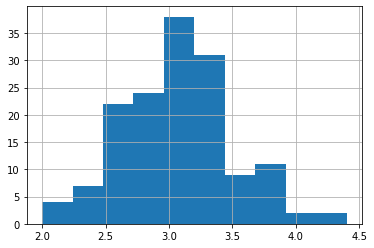

In [291]:
df['sepal_width'].hist()

<AxesSubplot:>

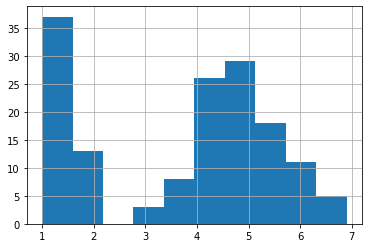

In [292]:
df['petal_length'].hist()

<AxesSubplot:>

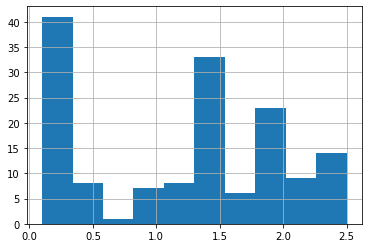

In [293]:
df['petal_width'].hist()

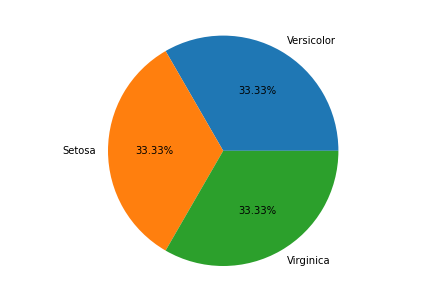

In [294]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

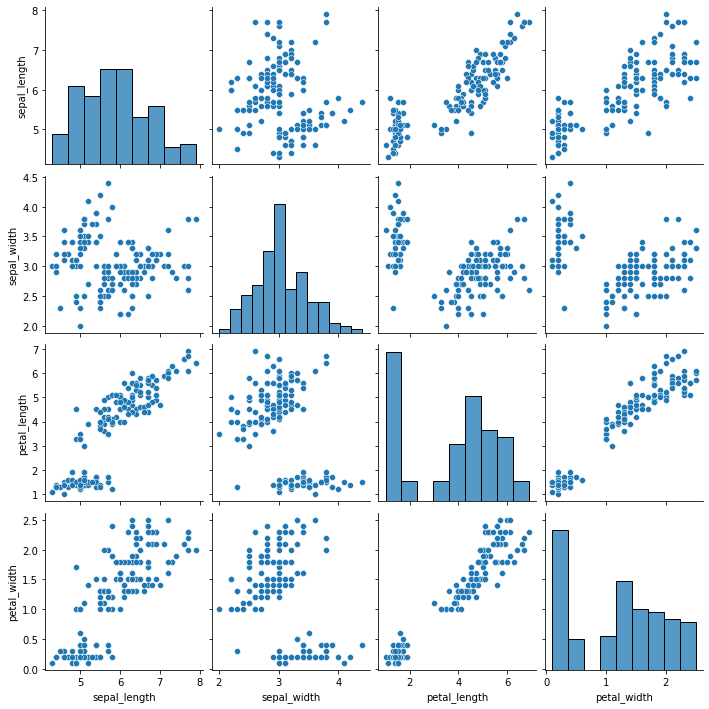

In [295]:
sns.pairplot(df)

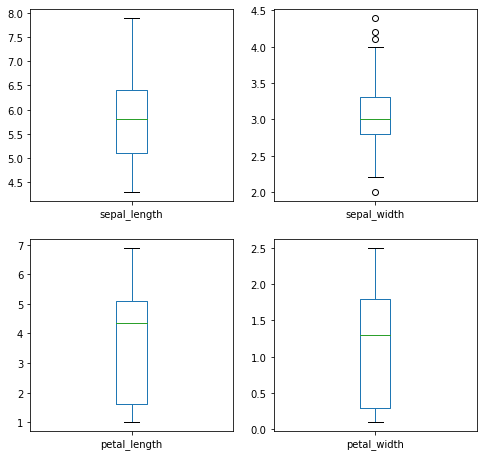

In [296]:
from matplotlib import pyplot
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(8,12))
pyplot.show()

In [297]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

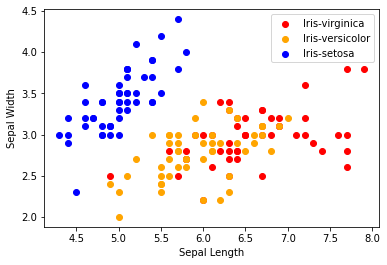

In [298]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

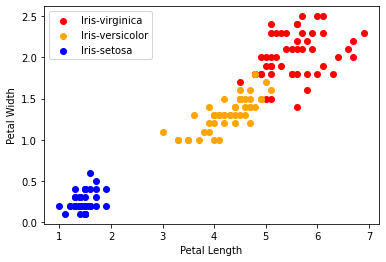

In [299]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

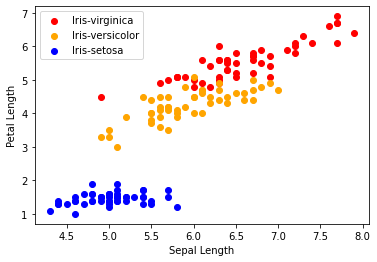

In [300]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

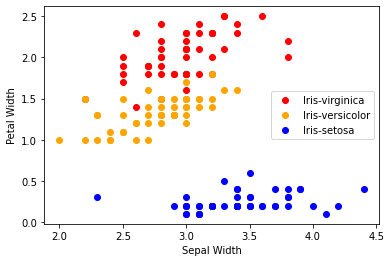

In [301]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

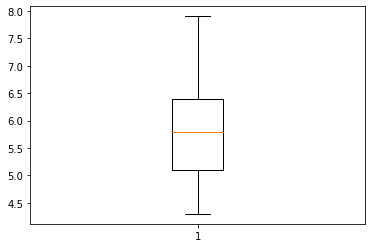

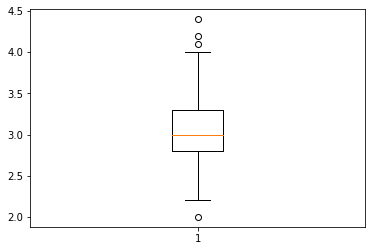

In [302]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

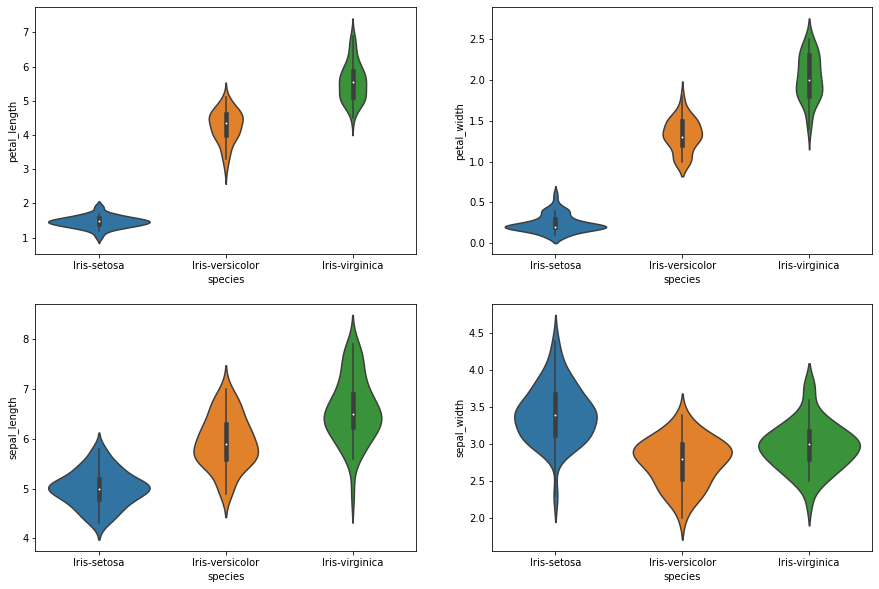

In [303]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

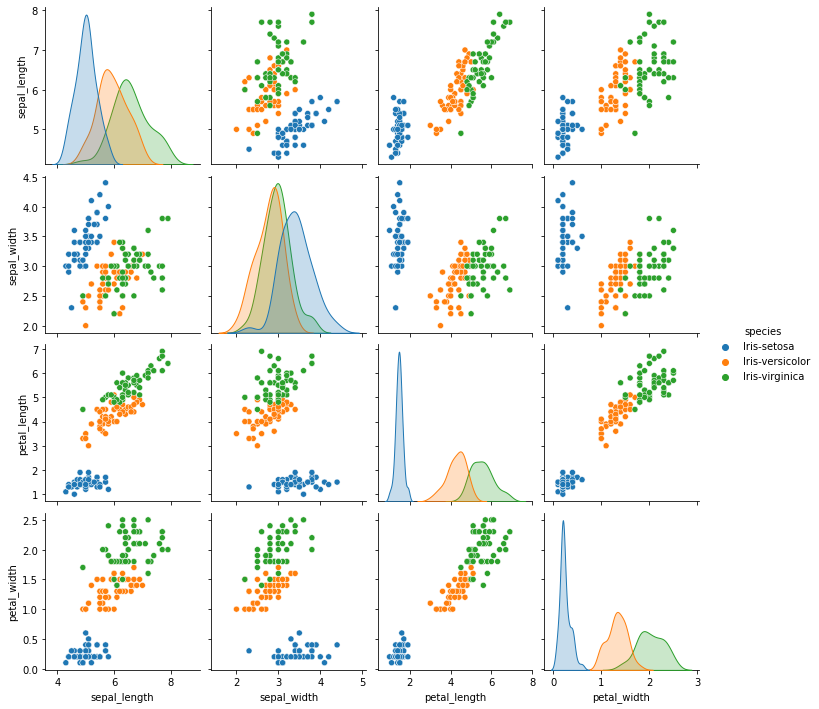

In [304]:
sns.pairplot(df,hue='species');

Applying Linear Regression

In [305]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression() 
linReg.fit(X_train, Y_train)
predict = linReg.predict(X_test)

In [306]:
linReg.score(X_test, Y_test)

0.8999447180621177

Text(0, 0.5, 'predict')

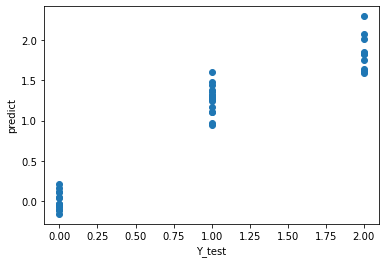

In [307]:
plt.scatter(Y_test,predict )
plt.xlabel('Y_test')
plt.ylabel('predict')

In [308]:
error= Y_test-predict

In [309]:
error.head()

114   -0.078634
62     0.033301
33     0.159341
107    0.177905
7      0.031287
Name: species, dtype: float64

<AxesSubplot:xlabel='species', ylabel='Density'>

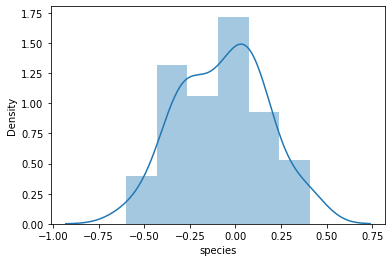

In [310]:
sns.distplot(error)

In [311]:
import sklearn
mse=  sklearn.metrics.mean_squared_error(Y_test, predict)
print(mse)

0.05879791876843453


Coorelation Matrix

In [312]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

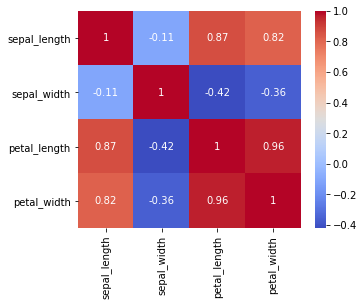

In [313]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Label Encoder

In [314]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [315]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [316]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [317]:
 from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [318]:
model.fit(x_train, y_train)

LogisticRegression()

In [319]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


Spliting the dataset

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [321]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


KNN Algorithm

In [322]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std = standard_scaler.transform(X_test)

In [323]:
X_train_std

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35146505],
       [ 0.92435306, -1.24018291,  1.09770233,  0.73721938],
       [-0.33612839, -1.24018291,  0.03977182, -0.16287405],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38014325],
       [ 0.46599617,  0.58106472,  0.48521625,  0.48004983],
       [-0.45071761, -1.46783886, -0.01590873, -0.16287405],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.73721938],
       [ 0.46599617, -0.55721505,  0.70793846,  0.35146505],
       [-1.13825295, -1.24018291,  0.37385514,  0.6086346 ],
       [ 0.46599617, -1.24018291,  0.6522579 ,  0.86580415],
       [ 1.26812073,  0.35340877,  0.48521625,  0.22288028],
       [ 0.69517462, -0.10190314,  0.76361901,  0.99438893],
       [ 0.1222285 ,  0.80872067,  0.37385514,  0.48004983],
       [-1.25284217,  0.

In [324]:
Y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: species, Length: 105, dtype: int32

In [325]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [326]:
from sklearn.metrics import accuracy_score
predict_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,predict_knn)*100

In [327]:
accuracy_knn

97.77777777777777

K mean Clustering

In [328]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


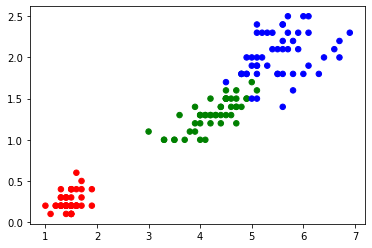

In [329]:
color_map=np.array(['Red','green','blue'])
figure=plt.scatter(df['petal_length'],df['petal_width'],c=color_map[Y],s=30)

In [330]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [331]:
from sklearn.cluster import KMeans
k_means =KMeans(n_clusters=3,random_state=2, n_jobs=4)
k_means.fit(X)

KMeans(n_clusters=3, n_jobs=4, random_state=2)

In [332]:
y_k_means = k_means.fit_predict(X)

In [333]:
centers = k_means.cluster_centers_

In [334]:
centers

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

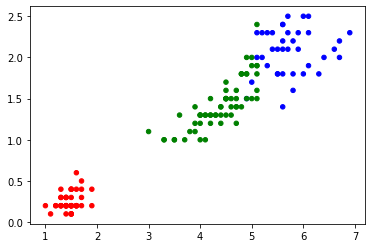

In [335]:
color_map=np.array(['Red','green','blue'])

labels=np.array(['Iris-setosa','Iris-virginica','Iris-versicolour'])
figure=plt.scatter(df['petal_length'],df['petal_width'],c=color_map[k_means.labels_],s=20)

Decision Tree

In [336]:
X_train.size

420

In [337]:
Y_train.size

105

In [338]:
from sklearn import tree
D_tree = tree.DecisionTreeClassifier()
D_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [339]:
pred_tree=D_tree.predict(X_test)
accuracy=accuracy_score(Y_test,pred_tree)*100

In [340]:
accuracy

97.77777777777777